# Viewing MNIST Dataset Images in Jupyter Notebook


This notebook demonstrates how to load and view images from the **MNIST dataset** using PyTorch in a Jupyter Notebook. 
The MNIST dataset contains images of handwritten digits (0-9), and we’ll load these images with PyTorch's DataLoader and 
display them along with their labels.


In [1]:

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformation to normalize the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


## Define a Function to Display Images

In [2]:

import numpy as np

# Function to show a batch of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image (reverse normalization)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()


## Display a Batch of Images with Labels

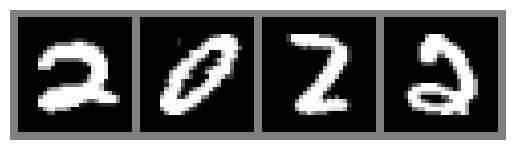

Labels: 2 0 2 2


In [3]:

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images, nrow=4))  # Display 4 images in a row
print("Labels:", " ".join(str(label.item()) for label in labels))



### Explanation of Code

1. **Data Loading**: We load the MNIST dataset with a transformation to normalize the pixel values to the range [-1, 1]. 
   The `DataLoader` is used to handle batching and shuffling of the data.

2. **Function to Display Images (`imshow`)**:
   - This function takes a batch of images and displays them as a grid.
   - We reverse the normalization applied earlier to make the images appear as expected.

3. **Display a Batch of Images with Labels**:
   - We retrieve a batch of images and labels from the DataLoader.
   - The images are displayed as a grid, and the labels are printed below the images.


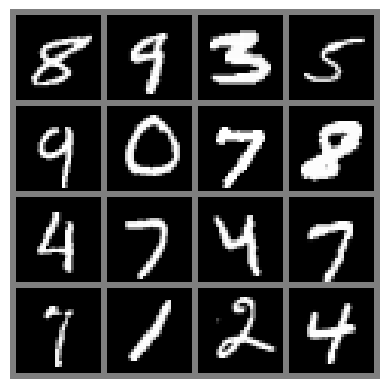

Labels: 8 9 3 5 9 0 7 8 4 7 4 7 7 1 2 4


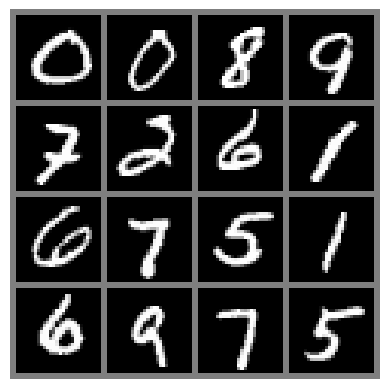

Labels: 0 0 8 9 7 2 6 1 6 7 5 1 6 9 7 5


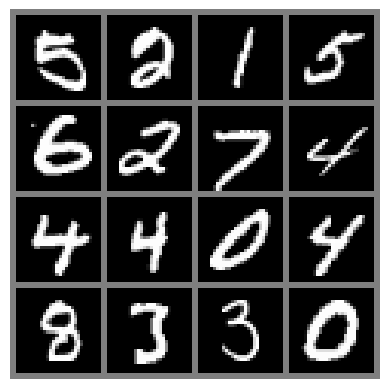

Labels: 5 2 1 5 6 2 7 4 4 4 0 4 8 3 3 0


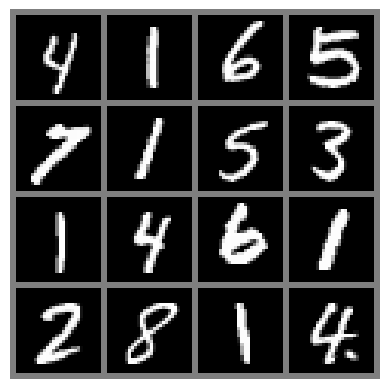

Labels: 4 1 6 5 7 1 5 3 1 4 6 1 2 8 1 4


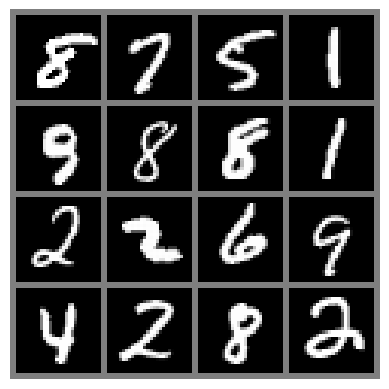

Labels: 8 7 5 1 9 8 8 1 2 2 6 9 4 2 8 2


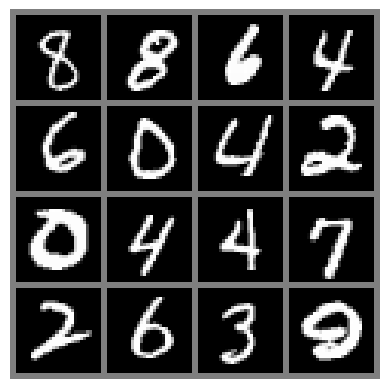

Labels: 8 8 6 4 6 0 4 2 0 4 4 7 2 6 3 9


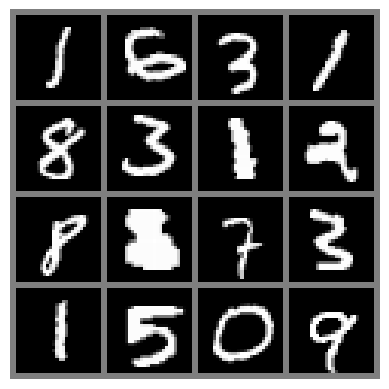

Labels: 1 6 3 1 8 3 1 2 8 8 7 3 1 5 0 9


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformation to normalize the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Function to show a batch of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image (reverse normalization)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

# Define the number of images to display
num_images_to_show = 100  # Adjust this to control how many images you want to display

# Display images in batches until the specified number is reached
images_shown = 0
for images, labels in trainloader:
    imshow(torchvision.utils.make_grid(images, nrow=4))  # Show images in a 4-column grid
    print("Labels:", " ".join(str(label.item()) for label in labels))
    images_shown += len(images)
    
    # Stop if we've displayed enough images
    if images_shown >= num_images_to_show:
        break
